## Dataset visualisation

In this notebook, we look at some images and labels of the dataset used. We also show how the weights of the w-BCE loss were computed (following the same computation stated by the documentation of Pytorch).

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from load_data import load_data

#### Load data

In [2]:
# Load the dataloaders with no no-PV images in the training set
tr_0, va, te = load_data(
  dir_data_training= "../data/train",
  dir_data_validation = "../data/validation",
  dir_data_test = "../data/test",
  prop_noPV_training= 0,
  min_rescale_images= 0.6,
  batch_size= 32
)

# Load the dataloaders with 25% of no-PV images in the training set
tr_25, _, _ = load_data(
  dir_data_training= "../data/train",
  dir_data_validation = "../data/validation",
  dir_data_test = "../data/test",
  prop_noPV_training= 0.25,
  min_rescale_images= 0.6,
  batch_size= 32
)

# Load the dataloaders with 50% of no-PV images in the training set
tr_50, _, _ = load_data(
  dir_data_training= "../data/train",
  dir_data_validation = "../data/validation",
  dir_data_test = "../data/test",
  prop_noPV_training= 0.5,
  min_rescale_images= 0.6,
  batch_size= 32
)

#### Visualise data

Visualise data on the train set where we apply random transforms (RandomCropResized and HorizontalFlip).

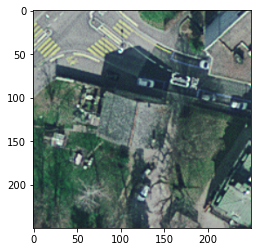

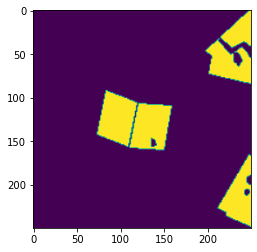

In [3]:
for sample in tr_25:
    # Put the image and the label in the correct format for imshow
    x = sample[0].numpy().transpose(0,2,3,1)
    y = sample[1].numpy().transpose(0,1,2)
    # Show the image
    plt.imshow(x[0])
    plt.show()
    # Show the label
    plt.imshow(y[0])
    plt.show()
    break

Visualise data on the test set (with no transforms).

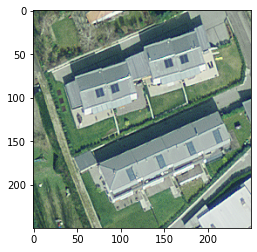

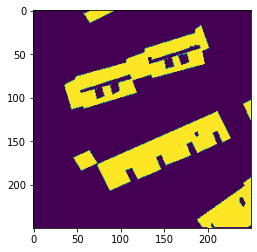

In [20]:
for sample in te:
    x = sample[0].numpy().transpose(0,2,3,1)
    y = sample[1].numpy().transpose(0,1,2)
    plt.imshow(x[0])
    plt.show()
    plt.imshow(y[0])
    plt.show()
    break

#### Compute the weight of the w-BCE

To compute the weights for the w-BCE loss, we proceed by computing the ratio pixels labelled as black (dominant class) divided by the pixels labelled as white for each dataloader.

In [5]:
def compute_weight(dl):
    """
    Compute the weight associated to a dataloader for the w-BCE loss (using Pytorch recommended method).
    
    Parameters
    ----------
    dl : torch.utils.data.DataLoader
    """
    black = 0
    white = 0

    for sample in dl:
        x = sample[0].numpy().transpose(0,2,3,1)
        y = sample[1].numpy().transpose(0,1,2)
        white += np.sum(y)
        black += y.size-np.sum(y)

    print("The weight for the BCE loss associated to the train set is {:.2f}".format(black/white))    

In [15]:
compute_weight(tr_0)

The weight for the BCE loss associated to the train set is 5.10


In [19]:
compute_weight(tr_25)

The weight for the BCE loss associated to the train set is 6.51


In [17]:
compute_weight(tr_50)

The weight for the BCE loss associated to the train set is 8.09


**Note**: The weights computed above may be slightly different from the those use and stated in the report, as a scan of the train set may vary from one to another due to the random transforms.